task 2
INSTAGRAM REACH FORECASTING

In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\user\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
data = pd.read_csv('Instagram-Reach.csv')
data

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [26]:
data.info

<bound method DataFrame.info of                     Date  Instagram reach
0    2022-04-01T00:00:00             7620
1    2022-04-02T00:00:00            12859
2    2022-04-03T00:00:00            16008
3    2022-04-04T00:00:00            24349
4    2022-04-05T00:00:00            20532
..                   ...              ...
360  2023-03-27T00:00:00            15622
361  2023-03-28T00:00:00            18645
362  2023-03-29T00:00:00            41238
363  2023-03-30T00:00:00            50490
364  2023-03-31T00:00:00            22014

[365 rows x 2 columns]>

In [27]:
data.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

In [28]:
#Convert date column to datetime datatype 

data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2022-04-01
1     2022-04-02
2     2022-04-03
3     2022-04-04
4     2022-04-05
         ...    
360   2023-03-27
361   2023-03-28
362   2023-03-29
363   2023-03-30
364   2023-03-31
Name: Date, Length: 365, dtype: datetime64[ns]

Analyzing Reach

In [29]:
data.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [30]:
x=data['Date']

In [31]:
x

0     2022-04-01
1     2022-04-02
2     2022-04-03
3     2022-04-04
4     2022-04-05
         ...    
360   2023-03-27
361   2023-03-28
362   2023-03-29
363   2023-03-30
364   2023-03-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [32]:
y=data['Instagram reach']

In [33]:
y

0       7620
1      12859
2      16008
3      24349
4      20532
       ...  
360    15622
361    18645
362    41238
363    50490
364    22014
Name: Instagram reach, Length: 365, dtype: int64

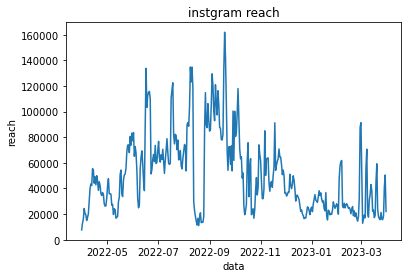

In [34]:
plt.plot(x ,y)
plt.xlabel('data')
plt.ylabel('reach')
plt.title('instgram reach')
plt.show()

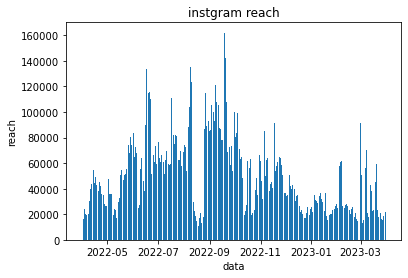

In [35]:
#Now let’s analyze Instagram reach for each day using a bar chart:
plt.bar(x ,y)
plt.xlabel('data')
plt.ylabel('reach')
plt.title('instgram reach')
plt.show()

C:\Users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Instagram reach'>

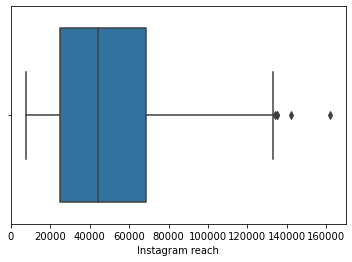

In [36]:
sns.boxplot(data['Instagram reach'])

In [37]:
#create a day column and analyze reach based on the days of the week.
data['Day'] = data['Date'].dt.day_name()
data.head()

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


In [55]:
#analyze the reach based on the days of the week.
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
day_stats.head()

,Day,mean,median,std
0,Friday,46666.849057,35574.0,29856.943036
1,Monday,52621.692308,46853.0,32296.071347
2,Saturday,47374.750000,40012.0,27667.043634
3,Sunday,53114.173077,47797.0,30906.162384
4,Thursday,48570.923077,39150.0,28623.220625


In [58]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [59]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

Instagram Reach Forecasting using Time Series Forecasting


In [60]:
from plotly.tools import mpl_to_plotly
from statsmodels.tsa.seasonal import seasonal_decompose

data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 432x288 with 0 Axes>

Set the method argument to 'ywm' to avoid the FutureWarning

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

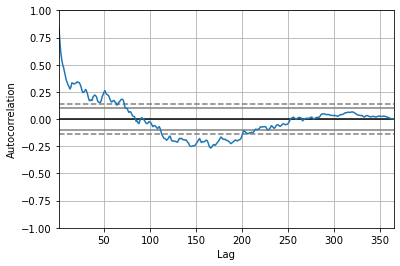

In [61]:
#here’s how to visualize an autocorrelation plot to find the value of p

pd.plotting.autocorrelation_plot(data["Instagram reach"])

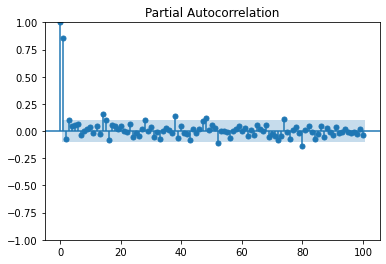

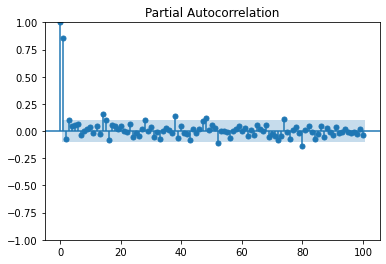

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf

# Setting the method argument to 'ywm' to avoid the FutureWarning
plot_pacf(data["Instagram reach"], lags = 100, method='ywm')

Time to train a model using SARIMA

In [63]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\user\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.515
Date:                            Fri, 22 Sep 2023   AIC                           7919.030
Time:                                    03:14:51   BIC                           8000.167
Sample:                                         0   HQIC                          7951.319
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1903      6.826      0.028      0.978     -13.189      13.570
ar.L2          0.4728      6.345   

In [64]:
# plotting the predictions

predictions = model.predict(len(data), len(data)+100)

trace_train = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()